In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score)

In [5]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
df = pd.read_csv("titanic_passengers.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


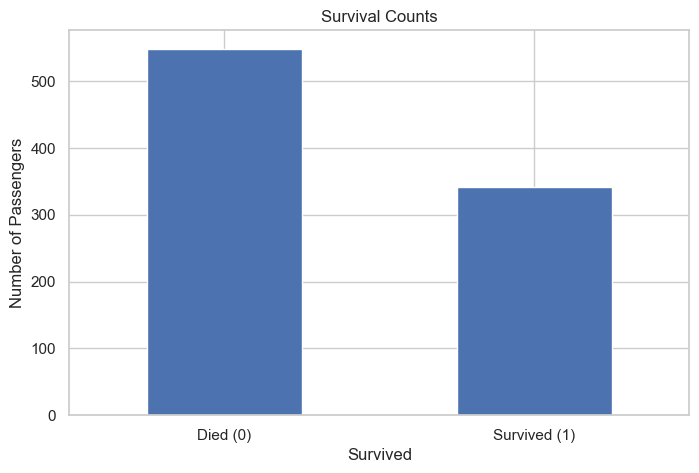

In [8]:
survival_counts = df['Survived'].value_counts()
survival_counts.plot(kind='bar')
plt.xticks([0, 1], ['Died (0)', 'Survived (1)'], rotation=0)
plt.title("Survival Counts")
plt.ylabel("Number of Passengers")
plt.show()

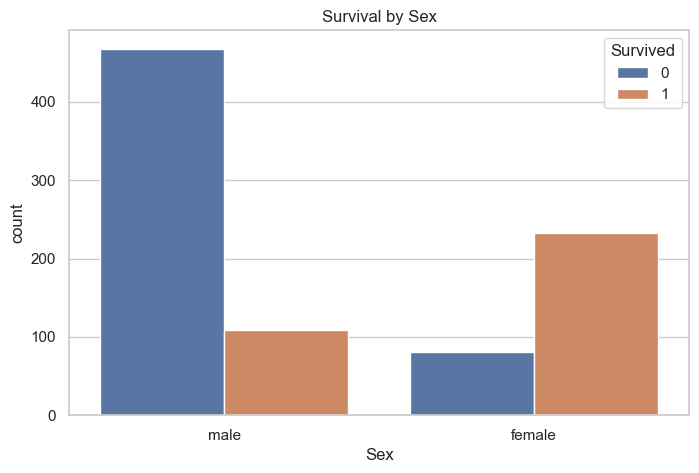

In [9]:
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Sex")
plt.show()

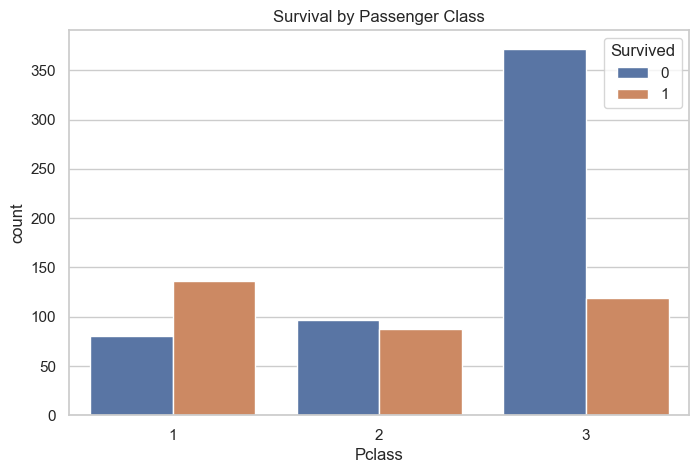

In [10]:
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by Passenger Class")
plt.show()

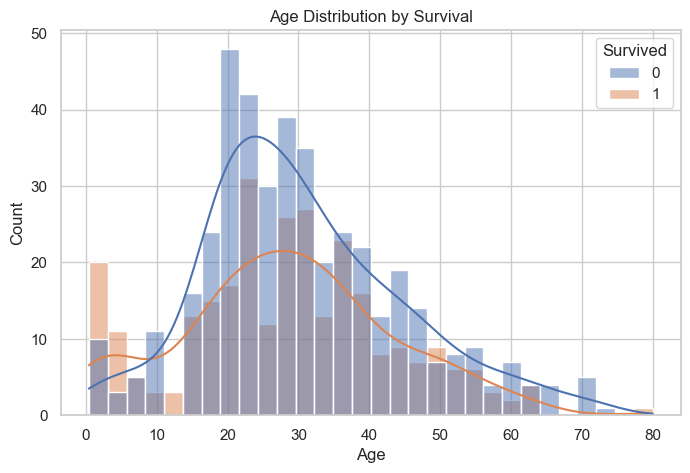

In [11]:
sns.histplot(data=df, x="Age", hue="Survived", kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()

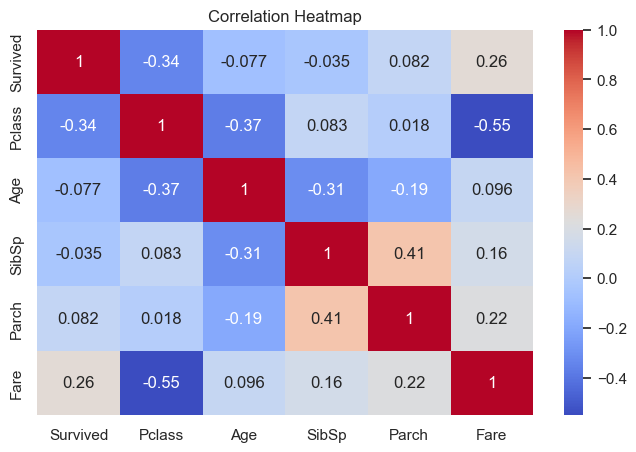

In [12]:
numeric_cols = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
df_model = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
df_model.isna().sum()
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
df_model["FamilySize"] = df_model["SibSp"] + df_model["Parch"] + 1
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [17]:
x_clf = df_model.drop("Survived", axis=1)
y_clf = df_model["Survived"]

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)
x_train_clf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
692,3,male,NaN,0,0,56.4958,S,1
481,2,male,NaN,0,0,0.0000,S,1
527,1,male,NaN,0,0,221.7792,S,1
855,3,female,18.0,0,1,9.3500,S,2
801,2,female,31.0,1,1,26.2500,S,3


In [22]:
numeric_features_clf = ["Pclass", "Age", "SibSp", "Parch", "Fare", "FamilySize"]
categorical_features_clf = ["Sex", "Embarked"]

numeric_transformer_clf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])
categorical_transformer_clf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor_clf = ColumnTransformer(transformers=[
    ("num", numeric_transformer_clf, numeric_features_clf), 
    ("cat", categorical_transformer_clf, categorical_features_clf),
])


In [26]:
log_reg_clf = Pipeline(steps=[
    ("preprocessor", preprocessor_clf),
    ("model", LogisticRegression(max_iter=1000))
])
log_reg_clf.fit(x_train_clf, y_train_clf)
y_pred_log = log_reg_clf.predict(x_test_clf)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test_clf, y_pred_log)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test_clf, y_pred_log)}")
print(f"Classification Report:\n {classification_report(y_test_clf, y_pred_log)}")

Logistic Regression Accuracy: 0.8044692737430168
Confusion Matrix:
 [[98 12]
 [23 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [28]:
cv_scores_log = cross_val_score(log_reg_clf, x_clf, y_clf, cv=5, scoring="accuracy")
print(f"Logistic Regression CV scores: {cv_scores_log}")
print(f"Mean CV accuracy: {cv_scores_log.mean()}")
print(f"Std Cv accuracy: {cv_scores_log.std()}")

Logistic Regression CV scores: [0.77094972 0.78651685 0.78651685 0.76966292 0.8258427 ]
Mean CV accuracy: 0.7878978093026175
Std Cv accuracy: 0.020314415554910252


In [30]:
rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor_clf),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        max_depth=None
    ))
])

rf_clf.fit(x_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(x_test_clf)

print(f"Random Forest Accuracy: {accuracy_score(y_test_clf, y_pred_rf)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test_clf, y_pred_rf)}")
print(f"Classification Report:\n {classification_report(y_test_clf, y_pred_rf)}")

Random Forest Accuracy: 0.8156424581005587
Confusion Matrix:
 [[97 13]
 [20 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [31]:
cv_scores_rf = cross_val_score(rf_clf, x_clf, y_clf, cv=5, scoring="accuracy")
print(f"Random Forest CV scores: {cv_scores_rf}")
print(f"Mean CV accuracy: {cv_scores_rf.mean()}")
print(f"Std CV accuracy: {cv_scores_rf.std()}")

Random Forest CV scores: [0.76536313 0.79775281 0.84831461 0.78089888 0.8258427 ]
Mean CV accuracy: 0.8036344234511331
Std CV accuracy: 0.030019049560209142


In [32]:
clf_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Test Accuracy": [
        accuracy_score(y_test_clf, y_pred_log),
        accuracy_score(y_test_clf, y_pred_rf)
    ],
    "CV Mean Accuracy": [
        cv_scores_log.mean(),
        cv_scores_rf.mean()
    ],
    "CV Std Accuracy": [
        cv_scores_log.std(),
        cv_scores_rf.std()
    ]
})

clf_results

,Model,Test Accuracy,CV Mean Accuracy,CV Std Accuracy
0,Logistic Regression,0.804469,0.787898,0.020314
1,Random Forest,0.815642,0.803634,0.030019


In [33]:
df_reg = df_model.dropna(subset=["Fare"]).copy()

x_reg = df_reg.drop(columns=["Fare", "Survived"])
y_reg = df_reg["Fare"]

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

x_train_reg.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
331,1,male,45.5,0,0,S,1
733,2,male,23.0,0,0,S,1
382,3,male,32.0,0,0,S,1
704,3,male,26.0,1,0,S,2
813,3,female,6.0,4,2,S,7


In [40]:
numeric_features_reg = ["Pclass", "Age", "SibSp", "Parch", "FamilySize"]
categorical_features_reg = ["Sex", "Embarked"]

numeric_transformer_reg = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])
categorical_transformer_reg = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_reg = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_reg, numeric_features_reg),
        ("cat", categorical_transformer_reg, categorical_features_reg)
    ]
)

lin_reg = Pipeline(steps=[
    ("preprocessor", preprocessor_reg),
    ("model", LinearRegression())
])

In [41]:
lin_reg.fit(x_train_reg, y_train_reg)

y_pred_lin = lin_reg.predict(x_test_reg)

mse_lin = mean_squared_error(y_test_reg, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test_reg, y_pred_lin)

print(f"Linear Regression RMSE: {rmse_lin}")
print(f"Linear Regression R2: {r2_lin}")


Linear Regression RMSE: 30.473145462848702
Linear Regression R2: 0.3998999484440192


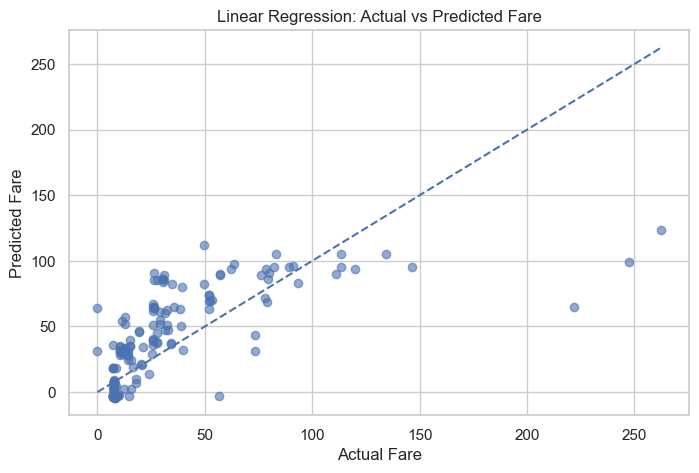

In [42]:
plt.scatter(y_test_reg, y_pred_lin, alpha=0.6)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Linear Regression: Actual vs Predicted Fare")
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         linestyle="--")
plt.show()

In [46]:
rf_reg = Pipeline(steps=[
    ("preprocessor", preprocessor_reg),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        max_depth=None
    ))
])

rf_reg.fit(x_train_reg, y_train_reg)

y_pred_rf_reg = rf_reg.predict(x_test_reg)

mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"Random Forest Regressor RMSE: {rmse_rf}")
print(f"Random Forest Regressor R2: {r2_rf}")

Random Forest Regressor RMSE: 39.932026209921574
Random Forest Regressor R2: -0.03046154552473479


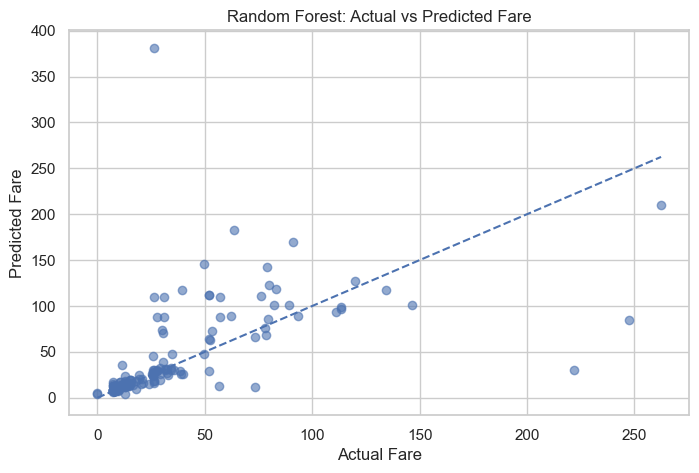

In [47]:
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.6)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Random Forest: Actual vs Predicted Fare")
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         linestyle="--")
plt.show()

In [48]:
reg_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "RMSE": [rmse_lin, rmse_rf],
    "R2": [r2_lin, r2_rf]
})
reg_results

,Model,RMSE,R2
0,Linear Regression,30.473145,0.399900
1,Random Forest Regressor,39.932026,-0.030462


## Summary of Models

### Classification (Survived)
- **Logistic Regression**
    - Test accuracy: 80.4%
    - Interpretable coefficients, good baseline.
- **Random Forest Classifier**
  - Test accuracy: 81.5%
  - Often higher accuracy than logistic; can capture non-linear relationships.
- Features with strong impact seem to be:
  - Sex (females more likely to survive)
  - PClass (1st class more likely to survive)
  - Possibly Fare and FamilySize.

### Regression (Fare)
- **Linear Regression**
  - RMSE: 30.47
  - R2: 0.399
  - Captures general relationships between class, age, and fare, but limited for complex patterns.
- **Random Forest Regressor**
  - RMSE: 39.93
  - R2: -0.030
  - Better at modeling non-linearities between features and fare.

### Interesting Finds
- Survival strongly depends on **Sex** and **Passenger Class**, support the "women and children first" and higher priority for 1st class.
- Fare is higher on average for people in 1st class and those who were more likely to survive.
- Family size appears to have a non-linear relationship: very large families may have lower survival probabilities.

### Next Steps
- Add more feature engineering: extract titles from names, create 'IsAlone', bucketize Age/Fare.
- Try additional models (KNN, SVM, Gradient Boosting) and hyperparameter tuning.
- Use feature importance plots from tree-based models for better interpretations.